# MDI220
# Statistics

# Project 

This is the project for the course on statistics.

You must fill this notebook and upload it on eCampus, **including figures**. Please make sure that it runs **without erros**.

You can work in teams but the final notebook, including text and code, must be **yours**. Any copy-pasting across students is strictly forbidden.

Please provide **concise answers** and **concise code**, with comments when appropriate.

## Your name: William Liaw

## Imports

Please do **not** import any other library.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
import seaborn as sns


In [3]:
from scipy.stats import norm, chi2, gaussian_kde


## Data

We consider the **daily electric power consumption** (in MW) in France in the period 2013-2023. The dataset is available on **eCampus**. 

Detailed information on this dataset is available [here](https://www.data.gouv.fr/fr/datasets/consommation-quotidienne-brute-regionale/).

In [4]:
# do not modify this cell
filename = "power_consumption.csv"
df = pd.read_csv(filename)


In [5]:
df.head()


,region,date,consumption
0,Auvergne-Rhône-Alpes,2013-01-01,7560
1,Auvergne-Rhône-Alpes,2013-01-02,8700
2,Auvergne-Rhône-Alpes,2013-01-03,9367
3,Auvergne-Rhône-Alpes,2013-01-04,9133
4,Auvergne-Rhône-Alpes,2013-01-05,8283


In [6]:
regions = list(df.region.unique())


In [7]:
regions


['Auvergne-Rhône-Alpes',
 'Bourgogne-Franche-Comté',
 'Bretagne',
 'Centre-Val de Loire',
 'Grand Est',
 'Hauts-de-France',
 'Normandie',
 'Nouvelle-Aquitaine',
 'Occitanie',
 'Pays de la Loire',
 "Provence-Alpes-Côte d'Azur",
 'Île-de-France']

In [8]:
# average consumption per region
df[["region", "consumption"]].groupby("region").mean().astype(int)


,consumption
region,
Auvergne-Rhône-Alpes,7495
Bourgogne-Franche-Comté,2416
Bretagne,2546
Centre-Val de Loire,2139
Grand Est,5155
Hauts-de-France,5726
Normandie,3168
Nouvelle-Aquitaine,4925
Occitanie,4266


In [9]:
# average consumption in France (MW)
df[["region", "consumption"]].groupby("region").mean().sum().astype(int)


consumption    53582
dtype: int32

In [10]:
# selection of a region
region = "Bretagne"
df_region = df[df.region == region]


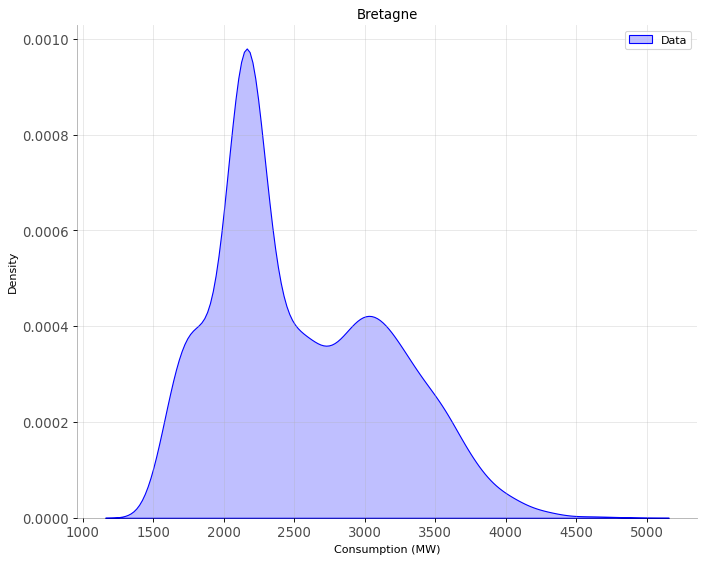

In [11]:
# density (with kde = kernel density estimation)
plt.figure(figsize=(10, 8), dpi=80)

sns.kdeplot(data=df_region, x="consumption", label="Data", color="blue", fill=True)
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend()

plt.xticks(fontsize=12, alpha=0.7)
plt.yticks(fontsize=12, alpha=0.7)
plt.grid(axis="both", alpha=0.3)
plt.gca().spines["top"].set_alpha(0.0)
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)
plt.gca().spines["left"].set_alpha(0.3)

plt.show()


## A. Parameter estimation

In all the project, the daily power consumptions are assumed to be i.i.d., with a Gaussian distribution. 

We use the following estimators for the mean and the variance, given $n$ observations $x_1,\ldots,x_n$:
$$
\hat \mu = \frac 1 n \sum_{i=1}^n x_i\quad \hat{\sigma^2} = \frac 1 {n-1}\sum_{i=1}^n (x_i - \hat \mu)^2
$$
The corresponding estimate of the standard deviation is:
$$
\hat \sigma = \sqrt{\hat{\sigma^2}}
$$

Consider the region Bretagne. 

1. Show that the estimators for the mean and the variance are unbiased.

Your answer:

Given the bias function of the parameter $\theta$ and its estimator $\hat{\theta}$: $b(\theta, \hat{\theta}) = \mathbb{E}(\hat{\theta}(x)) - \theta$, the estimator $\hat{\theta}$ is unbiased if $b(\theta, \hat{\theta})= 0$.

**For the mean estimator $\hat{\mu}$:**

\begin{align*}
\mathbb{E}(\hat{\mu}) &= \mathbb{E}(\frac{1}{n} \sum_{i=1}^n x_i) \\
&= \frac{1}{n} \sum_{i=1}^n \mathbb{E}(x_i) \quad \text{(linearity of expectation)} \\
&= \frac{1}{n} \sum_{i=1}^n \mu \quad \text{(assuming that the distribution mean is $\mu$ for all $x_i$)} \\
&= \frac{1}{n} \cdot n \mu \\
&= \mu
\end{align*}

Thus, $b(\mu, \hat{\mu}) = \mathbb{E}(\hat{\mu}(x)) - \mu = \mu - \mu = 0$, which gives that the estimator for the mean, $\hat{\mu}$, is unbiased.

**For the variance estimator $\hat{\sigma^2}$:**

\begin{align*}
\mathbb{E}(\hat{\sigma^2}) &= \mathbb{E}(\frac{1}{n-1} \sum_{i=1}^n (x_i - \hat{\mu})^2) \\
\end{align*}

Starting by analyzing the term: 

\begin{align*}
\sum_{i=1}^n (x_i - \hat{\mu})^2 &= \sum_{i=1}^n (x_i - \mu + \mu - \hat{\mu})^2 \\
&= S + 2\cdot\sum_{i=1}^n (x_i - \mu)(\mu - \hat{\mu}) + \sum_{i=1}^n (\mu - \hat{\mu})^2 \\
&= S - 2n(\mu - \hat{\mu})^2 + n(\mu - \hat{\mu})^2 \\
&= \sum_{i=1}^n (x_i - \mu)^2 - n(\mu - \hat{\mu})^2 \\
&= \sum_{i=1}^n (x_i - \mu)^2 - n(\hat{\mu} - \mu)^2 \\
\end{align*}

Using the definition that $\sigma^2= Var(X) =\mathbb{E}((X - \mathbb{E}(X))^2)$, we can infer than, that:

\begin{align*}
\mathbb{E}(\hat{\sigma^2}) &= \mathbb{E}(\frac{1}{n-1} \sum_{i=1}^n (x_i - \hat{\mu})^2) \\
&= \mathbb{E}(\frac{1}{n-1}(\sum_{i=1}^n (x_i - \mu)^2 - n(\hat{\mu} - \mu)^2)) \\
&= \frac{1}{n-1}(\sum_{i=1}^n \mathbb{E}((x_i - \mu)^2) - n\mathbb{E}((\hat{\mu} - \mu)^2)) \quad \text{(linearity of expectation)} \\
&= \frac{1}{n-1}(n\sigma^2 - nVar(\hat{\mu})) \quad \text{(assuming that the distribution variance is $\sigma$ for all $x_i$)} \\
&= \frac{1}{n-1}(n\sigma^2 - nVar(\frac{1}{n}\sum_{i=1}^n x_i)) \\
&= \frac{1}{n-1}(n\sigma^2 - n\cdot\frac{1}{n^2}Var(\sum_{i=1}^n x_i)) \\
&= \frac{1}{n-1}(n\sigma^2 - \frac{1}{n}\sum_{i=1}^n Var(x_i)) \quad \text{(as all $x_i$ are i.i.d.)} \\
&= \frac{1}{n-1}(n\sigma^2 - \frac{1}{n}\cdot n\sigma^2) \\
&= \frac{n-1}{n-1}\cdot\sigma^2 \\
&= \sigma^2 \\
\end{align*}

Therefore, $b(\sigma^2, \hat{\sigma^2}) = \mathbb{E}(\hat{\sigma^2}(x)) - \sigma^2 = \sigma^2 - \sigma^2 = 0$, which gives that the estimator for the variance, $\hat{\sigma^2}$, is unbiased.

2. Give the values obtained for the mean and the standard deviation using these estimators.

The following cell implements the expressions for the estimators of the mean and standard deviation of the region Bretagne. They are yield the same result as the following python more "pure" code: 

```python
mean_region = sum(df_region["consumption"]) / len(df_region["consumption"])
std_region = (
    sum([(val - mean_region) ** 2 for val in df_region["consumption"]])
    / (len(df_region["consumption"]) - 1)
) ** (1 / 2)
```

In [12]:
mean_region = np.mean(df_region["consumption"])
std_region = np.std(df_region["consumption"], ddof=1)

print("Mean:\t\t\t%.5fMW" % mean_region)
print("Standard deviation:\t%.5fMW" % std_region)


Mean:			2546.53616MW
Standard deviation:	604.94298MW


3. Generate new data using the corresponding Gaussian model, with the same number of samples.

In [13]:
np.random.seed(0)
df_region_generated = norm(loc=mean_region, scale=std_region).rvs(
    size=df_region.shape[0]
)


4. Plot the *kde* (kernel density estimate) of real data and the *kde* of generated data on the same figure.

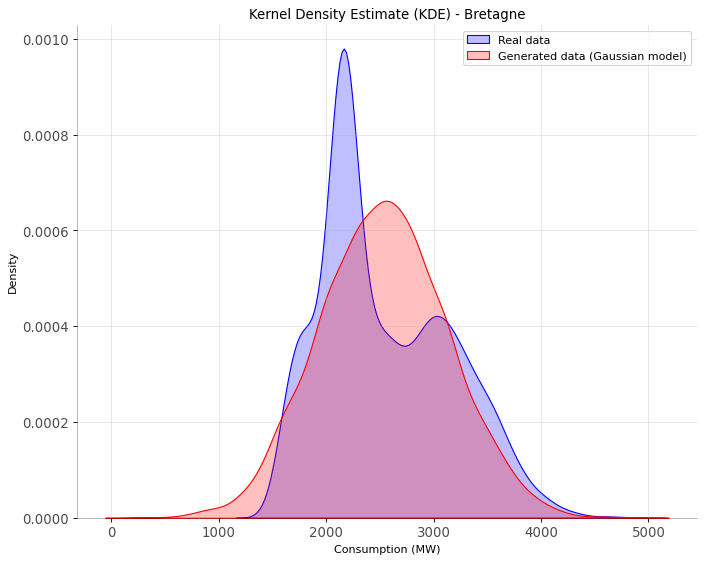

In [14]:
plt.figure(figsize=(10, 8), dpi=80)

sns.kdeplot(data=df_region, x="consumption", label="Real data", color="blue", fill=True)
sns.kdeplot(
    data=df_region_generated,
    label="Generated data (Gaussian model)",
    color="red",
    fill=True,
)
plt.title("Kernel Density Estimate (KDE) - Bretagne")
plt.xlabel("Consumption (MW)")
plt.legend()

plt.xticks(fontsize=12, alpha=0.7)
plt.yticks(fontsize=12, alpha=0.7)
plt.grid(axis="both", alpha=0.3)
plt.gca().spines["top"].set_alpha(0.0)
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)
plt.gca().spines["left"].set_alpha(0.3)

plt.show()


5. Do the same for the days corresponding to winter (from December 22 to March 21), after updating the model.

In [15]:
def getWinter(df_region):
    """Gets all winter days on a same year (and NOT the days of the winter that started on a year and finished on the next one)"""

    df_region_winter = df_region.copy()
    df_region_winter["date"] = pd.to_datetime(df_region_winter["date"])
    df_region_winter["year"] = df_region_winter["date"].dt.year
    df_region_winter["month"] = df_region_winter["date"].dt.month
    df_region_winter["day"] = df_region_winter["date"].dt.day

    df_region_winter = df_region_winter[
        np.logical_or.reduce(
            (
                np.in1d(df_region_winter["month"], [1, 2]),
                np.logical_and(
                    df_region_winter["month"] == 12, df_region_winter["day"] >= 22
                ),
                np.logical_and(
                    df_region_winter["month"] == 3, df_region_winter["day"] <= 21
                ),
            )
        )
    ]

    return df_region_winter


df_region_winter = getWinter(df_region)


In [16]:
mean_region_winter = np.mean(df_region_winter["consumption"])
std_region_winter = np.std(df_region_winter["consumption"], ddof=1)

print("Mean:\t\t\t%.5fMW" % mean_region_winter)
print("Standard deviation:\t%.5fMW" % std_region_winter)


Mean:			3214.17821MW
Standard deviation:	409.47637MW


In [17]:
np.random.seed(0)
df_region_winter_generated = norm(loc=mean_region_winter, scale=std_region_winter).rvs(
    size=df_region_winter.shape[0]
)


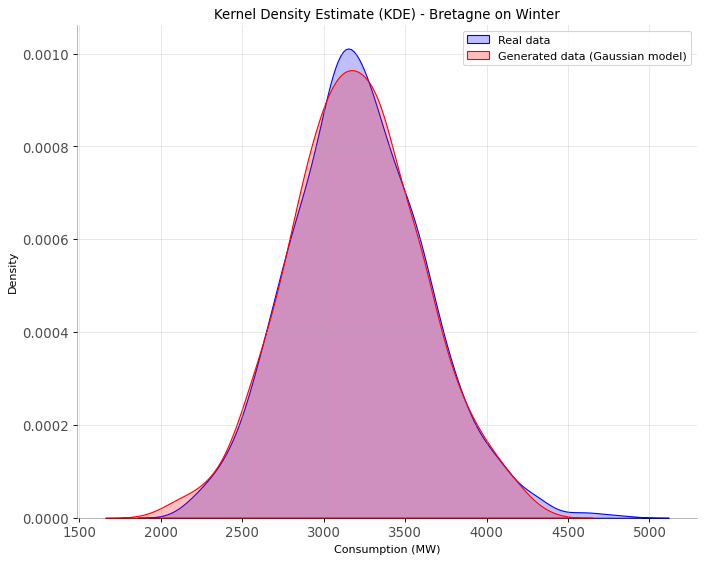

In [18]:
plt.figure(figsize=(10, 8), dpi=80)

sns.kdeplot(
    data=df_region_winter, x="consumption", label="Real data", color="blue", fill=True
)
sns.kdeplot(
    data=df_region_winter_generated,
    label="Generated data (Gaussian model)",
    color="red",
    fill=True,
)
plt.title("Kernel Density Estimate (KDE) - Bretagne on Winter")
plt.xlabel("Consumption (MW)")
plt.legend()

plt.xticks(fontsize=12, alpha=0.7)
plt.yticks(fontsize=12, alpha=0.7)
plt.grid(axis="both", alpha=0.3)
plt.gca().spines["top"].set_alpha(0.0)
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)
plt.gca().spines["left"].set_alpha(0.3)

plt.show()


6. In which case the Gaussian model seems more appropriate?

The Gaussian model seems more appropriate on the second case, as the generated distribution seems to be better "fitted" on the real data, as it is less dissimilar, in the general case.

## B. Goodness of fit

We would like to confirm and quantify the observation of part A.

We propose the following metric to measure the dissimilarity between two pdf $f$ and $g$ (with respect to the Lebesgue measure):
$$
d(f, g) = \frac 1 2 \int |f(x) - g(x)| \mathrm dx.
$$

1. Show that $d(f,g) \in [0,1]$, with $d(f,g)=0$ if and only if $f=g$ almost everywhere (for the Lebesgue measure) and $d(f,g)=1$ if and only if $f$ and $g$ have disjoint supports.

Your answser:

To show that $ d(f, g) \in [0,1] $, one must first realize:

1. $ d(f, g) \geq 0 $, which is logical, as $ |f(x) - g(x)| $ is always non-negative, and the integral of a non-negative function is also non-negative.

2. $ d(f, g) \leq 1 $ is a consequence of $ f $ and $ g $ being both pdf, which means that, by definition:

   $$
   f \geq 0, \quad g \geq 0 \\
   \int f(x)\mathrm{d}x = 1, \quad \int g(x)\mathrm{d}x = 1
   $$

   Thus $ d(f, g) = \frac{1}{2}\int|f(x) - g(x)| \mathrm{d}x \leq \frac{1}{2}(\int|f(x)|\mathrm{d}x + \int|g(x)|\mathrm{d}x) = \frac{2}{2} = 1$.

Furthermore, to show that $ d(f, g) = 0 $ if and only if $ f = g $ almost everywhere, and $ d(f, g) = 1 $ if and only if $ f $ and $ g $ have disjoint supports, one must consider that:

1. $ d(f, g) = 0 = \frac{1}{2}\int|f(x) - g(x)| \mathrm{d}x $. As $ |f(x) - g(x)| $ is non-negative, for the integral to be zero $ f(x) - g(x) $ must be equal to zero almost everywhere.
2. $ d(f, g) = 1 = \frac{1}{2}\int|f(x) - g(x)| \mathrm{d}x $, which means that $ \int|f(x) - g(x)| \mathrm{d}x = 2 $. By the definition of pdf, this last result is if and only if $ |f(x) - g(x)| = 1 $ almost everywhere. Consequently $ f $ and $ g $ have disjoint supports.

2. For the region Bretagne, compute the dissimilarity between the *kde* of real data and the density of the Gaussian model.

In [19]:
def dissimilarityLebesgue(x, f_x, g_x):
    return 0.5 * np.trapz(np.abs(f_x - g_x), x)


x = np.linspace(
    start=np.min(df_region["consumption"]),
    stop=np.max(df_region["consumption"]),
    num=df_region.shape[0],
)
f_x = gaussian_kde(df_region["consumption"])(x)
g_x = norm(loc=mean_region, scale=std_region).pdf(x)

lebesgue_measure_region = dissimilarityLebesgue(x, f_x, g_x)

print("Dissimilarity (Lebesgue measure): %.5f" % lebesgue_measure_region)


Dissimilarity (Lebesgue measure): 0.16178


3. Do the same for the region Bretagne in winter and check your conclusion of part A.

In [20]:
x = np.linspace(
    start=np.min(df_region_winter["consumption"]),
    stop=np.max(df_region_winter["consumption"]),
    num=df_region_winter.shape[0],
)
f_x = gaussian_kde(df_region_winter["consumption"])(x)
g_x = norm(loc=mean_region_winter, scale=std_region_winter).pdf(x)

lebesgue_measure_region_winter = dissimilarityLebesgue(x, f_x, g_x)

print("Dissimilarity (Lebesgue measure): %.5f" % lebesgue_measure_region_winter)


Dissimilarity (Lebesgue measure): 0.02946


4. Do the same for all regions. Give the result as a single dataframe.

In [21]:
def getDissimilarityRegionWinter(region):
    df_region = df[df["region"] == region]

    mean_region = np.mean(df_region["consumption"])
    std_region = np.std(df_region["consumption"], ddof=1)

    x = np.linspace(
        np.min(df_region["consumption"]),
        np.max(df_region["consumption"]),
        num=df_region.shape[0],
    )
    f_x = gaussian_kde(df_region["consumption"])(x)
    g_x = norm(loc=mean_region, scale=std_region).pdf(x)

    lebesgue_measure_region = dissimilarityLebesgue(x, f_x, g_x)

    df_region_winter = getWinter(df_region)

    mean_region_winter = np.mean(df_region_winter["consumption"])
    std_region_winter = np.std(df_region_winter["consumption"], ddof=1)

    x = np.linspace(
        np.min(df_region_winter["consumption"]),
        np.max(df_region_winter["consumption"]),
        num=df_region_winter.shape[0],
    )
    f_x = gaussian_kde(df_region_winter["consumption"])(x)
    g_x = norm(loc=mean_region_winter, scale=std_region_winter).pdf(x)

    lebesgue_measure_region_winter = dissimilarityLebesgue(x, f_x, g_x)

    return lebesgue_measure_region, lebesgue_measure_region_winter


In [22]:
df_dissimiarities = pd.DataFrame(
    [
        (region, *getDissimilarityRegionWinter(region))
        for region in df["region"].unique()
    ],
    columns=["region", "dissimilarity", "dissimilarity winter"],
)


In [23]:
df_dissimiarities


,region,dissimilarity,dissimilarity winter
0,Auvergne-Rhône-Alpes,0.152976,0.037066
1,Bourgogne-Franche-Comté,0.119683,0.036725
2,Bretagne,0.161783,0.029456
3,Centre-Val de Loire,0.172764,0.042221
4,Grand Est,0.107346,0.037367
5,Hauts-de-France,0.119946,0.026283
6,Normandie,0.172445,0.041308
7,Nouvelle-Aquitaine,0.195011,0.052095
8,Occitanie,0.198910,0.059805
9,Pays de la Loire,0.152960,0.036723


5. Which region is best fitted by a Gaussian model in winter?

In [24]:
least_dissimilar_region = df_dissimiarities.iloc[
    np.argmin(df_dissimiarities["dissimilarity winter"])
]["region"]

print(
    "The region in which there is a smallest dissimilarity (Lebesgue measure) is %s"
    % least_dissimilar_region
)


The region in which there is a smallest dissimilarity (Lebesgue measure) is Hauts-de-France


6. For this region and this season, plot the *kde* of real data and the *kde* of generated data on the same figure, as in part A.

In [25]:
region = df_dissimiarities.iloc[np.argmin(df_dissimiarities["dissimilarity winter"])]["region"]
df_region = df[df["region"] == region]
df_region_winter = getWinter(df_region)

mean_region_winter = np.mean(df_region_winter["consumption"])
std_region_winter = np.std(df_region_winter["consumption"], ddof=1)

np.random.seed(0)
df_region_winter_generated = norm(loc=mean_region_winter, scale=std_region_winter).rvs(
    size=df_region_winter.shape[0]
)


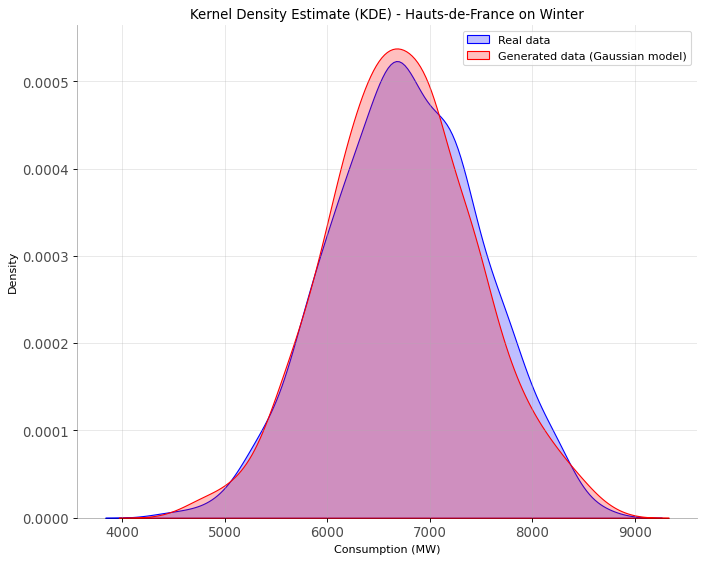

In [26]:
plt.figure(figsize=(10, 8), dpi=80)

sns.kdeplot(
    data=df_region_winter, x="consumption", label="Real data", color="blue", fill=True
)
sns.kdeplot(
    data=df_region_winter_generated,
    label="Generated data (Gaussian model)",
    color="red",
    fill=True,
)
plt.title("Kernel Density Estimate (KDE) - %s on Winter" % region)
plt.xlabel("Consumption (MW)")
plt.legend()

plt.xticks(fontsize=12, alpha=0.7)
plt.yticks(fontsize=12, alpha=0.7)
plt.grid(axis="both", alpha=0.3)
plt.gca().spines["top"].set_alpha(0.0)
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)
plt.gca().spines["left"].set_alpha(0.3)

plt.show()


## C. Bayesian statistics

We would like to include prior knowledge on the estimation, using Bayesian statistics.

Consider the region Bretagne in winter. We focus on the mean $\mu$, assuming the standard deviation is known and equal to $\sigma=400$ MW. We assume a Gaussian prior on $\mu$ with mean $\mu_0=3500$ MW and standard deviation $\sigma_0=500$ MW. 

1. Give the posterior distribution of $\mu$, using the parameters $\sigma$, $\mu_0$, $\sigma_0$ and the $n$ observations $x_1,\ldots,x_n$.

Your answer:

The posterior distribution of $ \mu $ is given by:

$$
\Pi(\mu|x) \varpropto p(x|\mu)\Pi(\mu)
$$

where $ p(x|\mu) $ the likelihood of the data given $ \mu $, $ \Pi(\mu) $ the prior distribution.

The likelihood can be written as:

$$
p(x|\mu) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\big(-\frac{\sum_{i=1}^n (x_i - \mu)^2}{2\sigma^2}\big)
$$

$$
p(x|\mu) \varpropto \exp\big(-\frac{\sum_{i=1}^n (x_i - \mu)^2}{2\sigma^2}\big)
$$

and the prior distribution, which is assumed to follow a Gaussian distribution, can be written as:

$$
\Pi(\mu) = \frac{1}{\sqrt{2\pi\sigma_0^2}}\exp\big(-\frac{(\mu - \mu_0)^2}{2\sigma_0^2}\big)
$$

$$
\Pi(\mu) \varpropto \exp\big(-\frac{(\mu - \mu_0)^2}{2\sigma_0^2}\big)
$$

Substituting on the original expression, gives:

\begin{align*}
\Pi(\mu|x) &\varpropto \exp\big(-\frac{\sum_{i=1}^n (x_i - \mu)^2}{2\sigma^2}\big)\exp\big(-\frac{(\mu - \mu_0)^2}{2\sigma_0^2}\big) \\
&\varpropto \exp\big(-\frac{\sum_{i=1}^n (x_i - \mu)^2}{2\sigma^2} - \frac{(\mu - \mu_0)^2}{2\sigma_0^2}\big) \\
&\varpropto \exp\big(-\frac{1}{2}(\frac{1}{\sigma^2}\sum_{i=1}^n (x_i^2 - 2x_i\mu + \mu^2) + \frac{1}{\sigma_0^2}(\mu^2 - 2\mu\mu_0 + \mu_0^2))\big) \\
&\varpropto \exp\big(-\frac{1}{2}((\frac{1}{\sigma^2}\sum_{i=1}^n x_i^2 - \frac{1}{\sigma^2} 2\mu\sum_{i=1}^n x_i + \frac{n}{\sigma^2} \mu^2) + (\frac{1}{\sigma_0^2}\mu^2 - \frac{1}{\sigma_0^2} 2\mu\mu_0 + \frac{1}{\sigma_0^2} \mu_0^2))\big) \\
&\varpropto \exp\big(-\frac{1}{2}((\frac{n}{\sigma^2} + \frac{1}{\sigma_0^2}) \mu^2 - 2\mu (\frac{1}{\sigma^2} \sum_{i=1}^n x_i + \frac{\mu_0}{\sigma_0^2}) + (\frac{1}{\sigma^2} \sum_{i=1}^n x_i^2 +\frac{\mu_0^2}{\sigma_0^2} ))\big)
\end{align*}

The posterior distribution can be written, then, as $ \mu|x \sim \mathcal{N}(\mu_n, \sigma_n^2) $, in which:

$$
\mu_n = \frac{\frac{\sum_{i=1}^n x_i}{\sigma^2} + \frac{\mu_0}{\sigma_0^2}}{\frac{n}{\sigma^2} + \frac{1}{\sigma_0^2}}
$$

and

$$
\sigma_n^2 = \big(\frac{n}{\sigma^2} + \frac{1}{\sigma_0^2}\big)^{-1}
$$

2. Give the parameters of the posterior distribution obtained for each year from 2013 to 2023, considered independently, in a single dataframe.

In [27]:
def getPosteriorParameters(year, sigma, mu_0, sigma_0):
    region = "Bretagne"
    df_region = df[df["region"] == region]
    df_region_winter = getWinter(df_region)

    mean_region_winter = np.mean(df_region_winter["consumption"])
    std_region_winter = np.std(df_region_winter["consumption"], ddof=1)

    np.random.seed(0)
    df_region_winter_generated = norm(loc=mean_region_winter, scale=std_region_winter).rvs(
        size=df_region_winter.shape[0]
    )

    df_region_winter_year = df_region_winter[df_region_winter["year"] == year]

    std2_n = (
        (df_region_winter_year.shape[0] / (sigma**2)) + (1 / (sigma_0**2))
    ) ** (-1)
    mu_n = std2_n * (
        (np.sum(df_region_winter_year["consumption"]) / (sigma**2))
        + (mu_0 / (sigma_0**2))
    )

    return mu_n, std2_n, np.sqrt(std2_n)


In [28]:
sigma = 400
mu_0 = 3500
sigma_0 = 500

df_posteriorParameters = pd.DataFrame(
    [
        (year, *getPosteriorParameters(year, sigma, mu_0, sigma_0))
        for year in range(2013, 2024)
    ],
    columns=["year", "mean", "variance", "standard deviation"],
)


In [29]:
df_posteriorParameters


,year,mean,variance,standard deviation
0,2013,3343.413504,1765.225066,42.014582
1,2014,3118.424537,1765.225066,42.014582
2,2015,3167.398500,1765.225066,42.014582
3,2016,3207.507639,1745.962462,41.784716
4,2017,3251.224625,1765.225066,42.014582
5,2018,3315.081642,1765.225066,42.014582
6,2019,3195.200794,1765.225066,42.014582
7,2020,3145.504147,1745.962462,41.784716
8,2021,3341.946161,1765.225066,42.014582
9,2022,3165.081642,1765.225066,42.014582


3. Plot the density of the posterior distribution in 2023 and the *kde* of real data in 2023 on the same plot.

In [30]:
year = 2023
region = "Bretagne"

df_region = df[df["region"] == region]
df_region_winter = getWinter(df_region)
df_region_winter_year = df_region_winter[df_region_winter["year"] == year]

std2_n = ((df_region_winter_year.shape[0] / (sigma**2)) + (1 / (sigma_0**2))) ** (
    -1
)
mu_n = std2_n * (
    (np.sum(df_region_winter_year["consumption"]) / (sigma**2))
    + (mu_0 / (sigma_0**2))
)

print("mu_n:\t%.5fMW" % mu_n)
print("std2_n:\t%.5fMW" % std2_n)

np.random.seed(0)
df_region_winter_year_posterior_generated = norm(loc=mu_n, scale=np.sqrt(std2_n)).rvs(
    size=df_region_winter_year.shape[0]
)


mu_n:	3117.54712MW
std2_n:	1984.12698MW


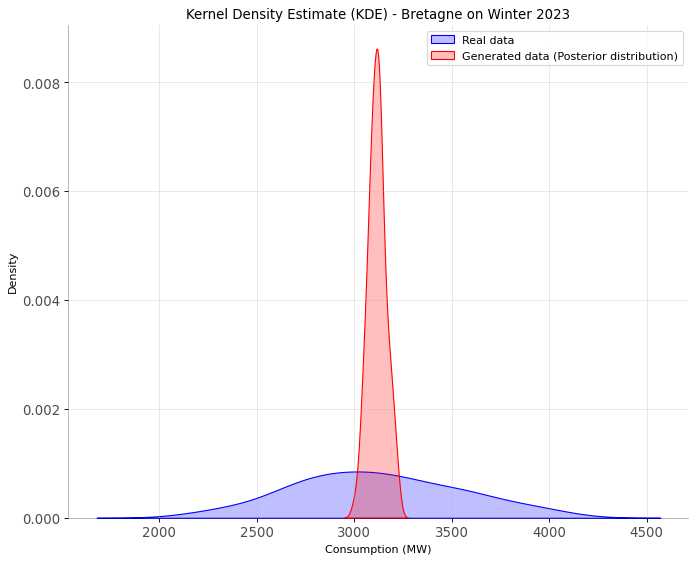

In [31]:
plt.figure(figsize=(10, 8), dpi=80)

sns.kdeplot(
    data=df_region_winter_year,
    x="consumption",
    label="Real data",
    color="blue",
    fill=True,
)
sns.kdeplot(
    data=df_region_winter_year_posterior_generated,
    label="Generated data (Posterior distribution)",
    color="red",
    fill=True,
)
plt.title("Kernel Density Estimate (KDE) - %s on Winter %d" % (region, year))
plt.xlabel("Consumption (MW)")
plt.legend()

plt.xticks(fontsize=12, alpha=0.7)
plt.yticks(fontsize=12, alpha=0.7)
plt.grid(axis="both", alpha=0.3)
plt.gca().spines["top"].set_alpha(0.0)
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)
plt.gca().spines["left"].set_alpha(0.3)

plt.show()


4. Discuss the results, comparing to those obtained in part A.

Your answer:

In [32]:
x = np.linspace(
    start=np.min(df_region_winter_year["consumption"]),
    stop=np.max(df_region_winter_year["consumption"]),
    num=df_region_winter_year.shape[0],
)
f_x = gaussian_kde(df_region_winter_year["consumption"])(x)
g_x = norm(loc=mu_n, scale=np.sqrt(std2_n)).pdf(x)

lebesgue_measure_region_winter_year_posterior = dissimilarityLebesgue(x, f_x, g_x)

print("Dissimilarity (Lebesgue measure): %.5f" % lebesgue_measure_region_winter_year_posterior)


Dissimilarity (Lebesgue measure): 0.79063


The posterior distribution, considering the given parameters for $ \mu $, $ \sigma $ and $ \sigma_0 $ is a less better fit, according to the Lebesgue measure for dissimilarity. A possible way to solve this would be to correct the parameters $ \mu $, $ \sigma $ and $ \sigma_0 $, or with the change of the choice of $ \Pi(\mu) $, the prior distribution. In particular, the variance does not seem to be appropriate as the generated data has a much less sparse distribution which does not corresponds to the real data.

## D. Hypothesis testing

Consider the region Bretagne. While the standard deviation is equal to 400MW in winter, you would like to test the hypothesis that it was 500MW in 2023. The mean is supposed to be known and equal to 3200MW.
1. Propose a statistical test at level $\alpha$.

Your answer:

**Two-tailed hypothesis**

To test the hypothesis that the standard deviation of power consumption in Bretagne during the winter of 2023 is $ 500 \text{MW} $, while the standard deviation is equal to $ 400 \text{MW} $, the mean is supposed to be known and equal to $ \mu = 3200 \text{MW} $, one can perform a uniformly most powerful hypothesis test for variance and propose a statistical test at significance level $ \alpha $ in the following way:

- **Null Hypothesis ($ H_0 $):** The standard deviation in 2023 is $ 400 \text{MW} $.
- **Alternative Hypothesis ($ H_1 $):** The standard deviation in 2023 is not $ 400 \text{MW} $ (i.e., it's $ 500 \text{MW} $).

In this case, as the main goal is to check wether the standard deviation is or is not $ 400 \text{MW} $, the most appropriate hypothesis is the **two-tailed hypothesis**. In this context, defining $ S = \sum_{i=1}^n(x_i - \mu)^2 $, it is known that:

$$
p_\sigma(x)\varpropto \exp\big(\frac{-S}{2\sigma^2}\big)
$$

which is a monotonic function. Thus, for some constants $ c_1 $, $ c_2 $, with $ c_1 < c_2 $, the test has the (uniformly most powerful) form:

$$
\delta(x) = \mathbf{1}_{S < c_1} + \mathbf{1}_{S > c_2}
$$

The constants $ c_1 $ and $ c_2 $ also satisfies:

$$
\alpha = P_0(S < c_1) + P_0(S > c_2)
$$

Assuming that $ x_i $ are i.i.d. variables that follow a Gaussian distribution: $ x_i \sim \mathcal{N}(\mu, \sigma_0^2) $ and using $ x_i \sim \sqrt{\sigma_0^2} Z_i + \mu $, with $ Z_i \sim \mathcal{N}(0, 1) $, it is possible to write:

$$
S \sim \sigma_0^2 \sum_{i=1}^n Z_i^2 \sim \sigma_0^2\chi^2 \quad \text{(by definition: } \sum_{i=1}^nZ_i^2 \sim \chi^2 \text{)}
$$

Thus:

$$
\alpha = P_0(\chi^2 < \frac{c_1}{\sigma_0^2}) + P_0(\chi^2 > \frac{c_2}{\sigma_0^2})
$$

In this case, $ \chi^2 $ has $ n $ degrees of freedom. Using the quantile function $ Q $ of this $ \chi^2 $ distribution, it is possible to infer that:

$$
Q\big(1 - \frac{\alpha}{2}\big) = \frac{c_2}{\sigma_0^2} \therefore c_2 = \sigma_0^2\cdot Q\big(1 - \frac{\alpha}{2}\big) \\
Q\big(\frac{\alpha}{2}\big) = \frac{c_1}{\sigma_0^2} \therefore c_1 = \sigma_0^2\cdot Q\big(\frac{\alpha}{2}\big)
$$

**Simple hypothesis**

Another way to test the hypothesis that the standard deviation of power consumption in Bretagne during the winter of 2023 is $ 500 \text{MW} $, while the standard deviation is equal to $ 400 \text{MW} $, the mean is supposed to be known and equal to $ \mu = 3200 \text{MW} $, is to perform a uniformly most powerful hypothesis test for variance and propose a statistical test at significance level $ \alpha $ in the following way:

- **Null Hypothesis ($ H_0 $):** The standard deviation in 2023 is $ 400 \text{MW} $.
- **Alternative Hypothesis ($ H_1 $):** The standard deviation in 2023 is $ 500 \text{MW} $.

In this case, as the main goal is to check wether the standard deviation is $ 400 \text{MW} $ or $ 500 \text{MW} $, the most appropriate hypothesis is the **simple hypothesis**. In this context, defining $ S = \sum_{i=1}^n(x_i - \mu)^2 $, it is known that:

\begin{align*}
\frac{p_1(x)}{p_0(x)} &\varpropto \frac{\exp\big(\frac{-S}{2\theta_1}\big)}{\exp\big(\frac{-S}{2\theta_0}\big)} \\
&\varpropto \exp\big(\frac{1}{2}\big(\frac{1}{\theta_0} - \frac{1}{\theta_1}\big)S\big) \\
\end{align*}

which is a monotonic function. Thus, for a constants $ c $, with $ c > 0 $, the test has the (uniformly most powerful) form:

$$
\delta(x) = \mathbf{1}_{S > c}
$$

The constants $ c $ also satisfies:

$$
\alpha = P_0(S > c)
$$

Assuming that $ x_i $ are i.i.d. variables that follow a Gaussian distribution: $ x_i \sim \mathcal{N}(\mu, \theta_0) $ and using $ x_i \sim \sqrt{\theta_0} Z_i + \mu $, with $ Z_i \sim \mathcal{N}(0, 1) $, it is possible to write:

$$
S \sim \theta_0 \sum_{i=1}^n Z_i^2 \sim \theta_0\chi^2 \quad \text{(by definition: } \sum_{i=1}^nZ_i^2 \sim \chi^2 \text{)}
$$

Thus:

$$
\alpha = P_0(\chi^2 > \frac{c}{\theta_0})
$$

In this case, $ \chi^2 $ has $ n $ degrees of freedom. Using the quantile function $ Q $ of this $ \chi^2 $ distribution, it is possible to infer that:

$$
Q\big(1 - \alpha\big) = \frac{c}{\theta_0} \therefore c = \theta_0\cdot Q\big(1 - \alpha) \\
$$

2. Provide the result of this test for $\alpha=1\%$.

In [33]:
year = 2023
region = "Bretagne"

df_region = df[df["region"] == region]
df_region_winter = getWinter(df_region)
df_region_winter_year = df_region_winter[df_region_winter["year"] == year]

alpha = 0.01
sigma_0 = 400
sigma_1 = 500
mu = 3200

S = np.sum(np.power(df_region_winter_year["consumption"] - mu, 2))


In [34]:
"""Two-tailed hypothesis"""

c_1 = (sigma_0**2) * chi2(df=df_region_winter_year.shape[0]).ppf(q=alpha / 2)
c_2 = (sigma_0**2) * chi2(df=df_region_winter_year.shape[0]).ppf(q=1 - (alpha / 2))

print("S:\t%.5f " % S)
print("c_1:\t%.5f " % c_1)
print("c_2:\t%.5f " % c_2)
print(
    "As S is not in the interval [c1, c2], we reject the null hypothesis: the standard deviation of the consumption in 2023 is not 400MW."
    if S < c_1 or S > c_2
    else "As S is in the interval [c1, c2], we accept the null hypothesis: the standard deviation of the consumption in 2023 is 400MW."
)



S:	14600063.00000 
c_1:	8187509.10247 
c_2:	18611369.04112 
As S is in the interval [c1, c2], we accept the null hypothesis: the standard deviation of the consumption in 2023 is 400MW.


In [35]:
"""Simple Hypothesis"""

c = (sigma_0**2) * chi2(df=df_region_winter_year.shape[0]).ppf(q=1 - alpha)

print("S:\t%.5f " % S)
print("c:\t%.5f " % c)
print(
    "As S is greater than c, we reject the null hypothesis: the standard deviation of the consumption in 2023 is not 400MW."
    if S > c
    else "As S is smaller than c, we accept the null hypothesis: the standard deviation of the consumption in 2023 is 400MW."
)


S:	14600063.00000 
c:	17972606.80325 
As S is smaller than c, we accept the null hypothesis: the standard deviation of the consumption in 2023 is 400MW.


## E. Testing independence

Consider the power consumption in Bretagne and Provence-Alpes-Côte d'Azur in winter. 

1. Visualize the joint distribution of power consumption in these 2 regions using seaborn.

In [36]:
region1 = "Bretagne"
df_bretagne = df[df["region"] == region1]
df_bretagne_winter = getWinter(df_bretagne)

region2 = "Provence-Alpes-Côte d'Azur"
df_paca = df[df["region"] == region2]
df_paca_winter = getWinter(df_paca)


<Figure size 640x640 with 0 Axes>

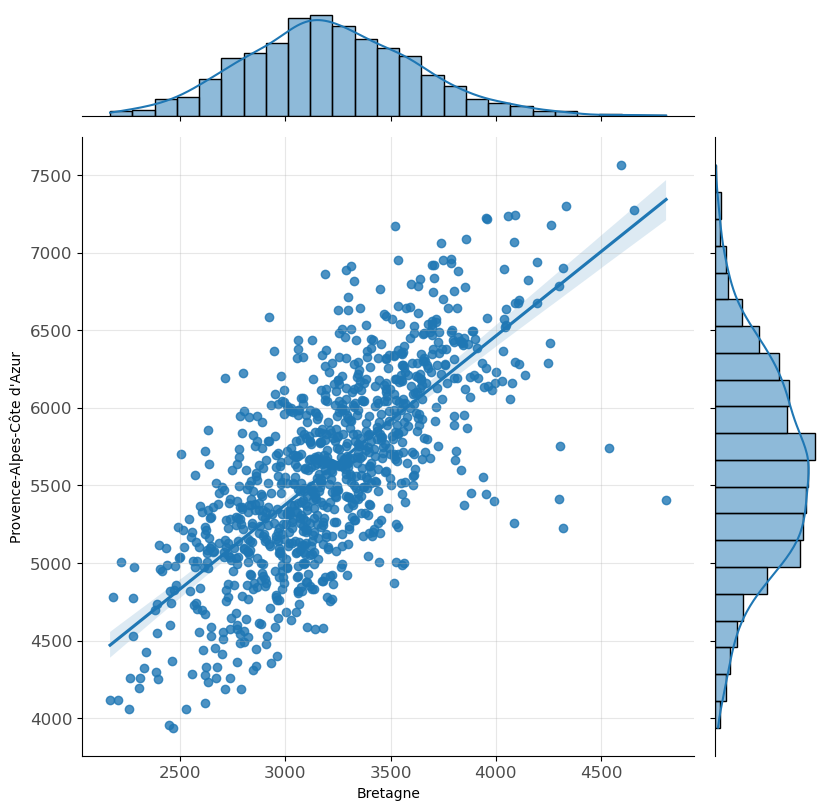

In [37]:
plt.figure(figsize=(8, 8), dpi=80)

sns.jointplot(
    x=list(df_bretagne_winter["consumption"]),
    y=list(df_paca_winter["consumption"]),
    kind="reg",
    height=8
)

plt.xlabel("%s" % region1)
plt.ylabel("%s" % region2)

plt.xticks(fontsize=12, alpha=0.7)
plt.yticks(fontsize=12, alpha=0.7)
plt.grid(axis="both", alpha=0.3)

plt.show()


2. Do you think the power consumption in these two regions is independent?

Your answer:

By looking at the plotted data, there seems to be a noticeable tendency, which is identifiable by the linear regression on the points. This means that the power consumption in the two analyzed regions is not independent, otherwise there would not be such incidents.

3. Propose a chi-2 test for the independence of the power consumption in these two regions at level $\alpha$. 

Your answer:

**$ \chi^2 $ test for independence**

To test the hypothesis that the power consumption in the two regions is independent during the winter, one can perform a uniformly most powerful hypothesis test for independence and propose a statistical test at significance level $ \alpha $ in the following way:

- **Null Hypothesis ($ H_0 $):** The power consumption in the two regions is independent $ X \perp Y $.
- **Alternative Hypothesis ($ H_1 $):** The power consumption in the two regions is not independent $ X \not\perp Y $.

In this case, as the main goal is to check wether the distributions are independent, the most appropriate test is the $ \chi^2 $. In this context, let $ N_{i,j} = \sum_{t=1}^n \mathbf{1}_{X_t\in A_i, Y_t\in B_i} $, $ N_{i} = \sum_{t=1}^n \mathbf{1}_{X_t\in A_i} $, $ N_{j} = \sum_{t=1}^n \mathbf{1}_{Y_t\in B_i} $ , it is known that:

$$
T(X, Y) = \sum_{i, j}\frac{(N_{ij} - \frac{N_i N_j}{n})^2}{\frac{N_i N_j}{n}} \xrightarrow{d} \chi^2((K - 1)(L - 1)) \quad \text{when } n \rightarrow +\infty
$$

Thus, for a constants $ c $, with $ c > 0 $, the test has the (uniformly most powerful) form:

$$
\delta(x, y) = \mathbf{1}_{T(x, y) > c}
$$

The constants $ c $ also satisfies:

$$
\alpha = P_0(T(X, Y) > c)
$$


Using the quantile function $ Q $ of this $ \chi^2 $ distribution, it is possible to infer that:

$$
c = Q\big(1 - \alpha\big)
$$

4. Give the result of this test for $\alpha=1\%$. 

In [38]:
alpha = 0.01
df_region12_winter = pd.DataFrame(
    [
        df_bretagne_winter["consumption"].to_numpy(),
        df_paca_winter["consumption"].to_numpy(),
    ],
    index=[region1, region2],
).T

bins = 10 # defined arbitrarily
H, xedges, yedges = np.histogram2d(
    x=df_region12_winter[region1], y=df_region12_winter[region2], bins=bins
)

Nis = np.sum(H, axis=0)
Njs = np.sum(H, axis=1)
n = np.sum(H)

T = np.nansum(
    [
        ((H[i, j] - (Nis[i] * Njs[j] / n)) ** 2) / (Nis[i] * Njs[j] / n)
        for j in range(bins)
        for i in range(bins)
    ]
)
c = chi2(df=(bins - 1) ** 2).ppf(q=1 - alpha)

print("T:\t%.5f" % T)
print("c:\t%.5f" % c)
print(
    "As T is greater than c, we reject the null hypothesis: the consumption in the two regions is not independent."
    if T > c
    else "As T is smaller than c, we accept the null hypothesis: the consumption in the two regions is independent."
)


T:	1485.44691
c:	113.51241
As T is greater than c, we reject the null hypothesis: the consumption in the two regions is not independent.


## F. Confidence intervals

Consider the region Bretagne in winter. 

1. Provide a confidence interval at level $\alpha=95\%$ for the mean power consumption. 

In [39]:
region = "Bretagne"
df_region = df[df["region"] == region]
df_region_winter = getWinter(df_region)

n = df_region_winter["consumption"].shape[0]
mean = np.mean(df_region_winter["consumption"])
std = np.std(df_region_winter["consumption"], ddof=1)

print("Mean:\t\t\t%.5fMW" % mean)
print("Standard deviation:\t%.5fMW" % std)

alpha = 0.95


Mean:			3214.17821MW
Standard deviation:	409.47637MW


In [40]:
"""Symmetric confidence interval"""

c = norm(loc=0, scale=1).ppf(1 - (1 - alpha) / 2)
delta = c * std / np.sqrt(n)

print("Confidence interval:\t [%.5f, %.5f] MW" % (mean - delta, mean + delta))


Confidence interval:	 [3188.56752, 3239.78889] MW


2. Give the result of a Student test at level $\alpha=5\%$ for the null hypothesis that the mean consumption in 2023 is equal to 3100MW.

In [41]:
df_region_winter_year = df_region_winter[df_region_winter["year"] == 2023]

n = df_region_winter_year["consumption"].shape[0]
mean = np.mean(df_region_winter_year["consumption"])
std = np.std(df_region_winter_year["consumption"], ddof=1)

print("Mean:\t\t\t%.5fMW" % mean)
print("Standard deviation:\t%.5fMW" % std)

alpha = 0.05
mu = 3100


Mean:			3114.48750MW
Standard deviation:	421.19589MW


As it is not possible to import additional libraries, here it is considered that $ n $ is sufficiently large so that $ St(n) \sim \mathcal{N}(0, 1) $.

In [42]:
"""Symmetric confidence interval"""

c = norm(loc=0, scale=1).ppf(1 - alpha / 2)
delta = c * std / np.sqrt(n)

print("c:\t%.5f" % c)
print("delta:\t%.5fMW" % delta)
print(
    "As the mean is not in the interval [%.5f, %.5f], we reject the null hypothesis: the mean consumption in 2023 is not equal to 3100MW."
    % (mu - delta, mu + delta)
    if mean < mu - delta or mean > mu + delta
    else "As the mean is in the interval [%.5f, %.5f], we accept the null hypothesis: the mean consumption in 2023 is equal to 3100MW."
    % (mu - delta, mu + delta)
)


c:	1.95996
delta:	92.29692MW
As the mean is in the interval [3007.70308, 3192.29692], we accept the null hypothesis: the mean consumption in 2023 is equal to 3100MW.
